# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

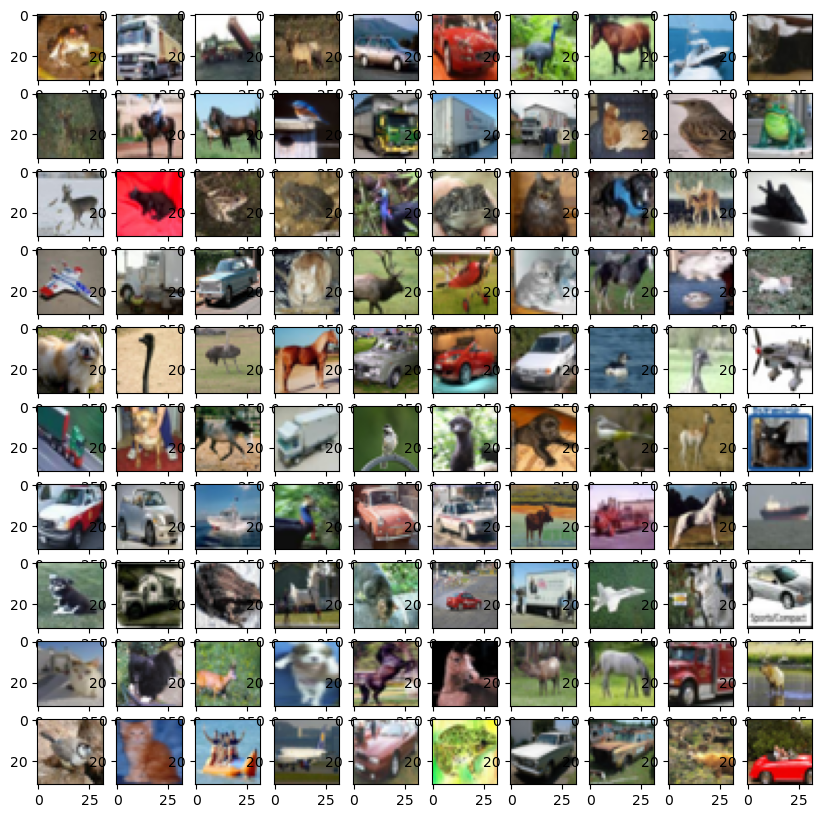

In [9]:
# Visualize the images:
plt.figure(figsize=(10,10))

for i in range(100):
	plt.subplot(10, 10, 1 + i)
	plt.imshow(x_train[i])
plt.show()

In [10]:
# Convert the labels to one-hot encoded form 
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [11]:
# Normalize the images
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [12]:
from keras.backend import clear_session
clear_session()

In [13]:
# Your code here :
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, kernel_size=3, activation='relu'), 
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')    
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [14]:
# Your code here :
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=512, epochs=50)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.1992 - loss: 2.2222
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.2774 - loss: 2.0657
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3124 - loss: 1.9662
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.3368 - loss: 1.9088
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.3531 - loss: 1.8680
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.3653 - loss: 1.8375
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3723 - loss: 1.8088
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3837 - loss: 1.7810
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.3904 - loss: 1.7559
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.3982 - loss: 1.7329
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.4045 - loss: 1.7117
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy:

*   Plot the cross entropy loss curve and the accuracy curve

Text(0, 0.5, 'Loss')

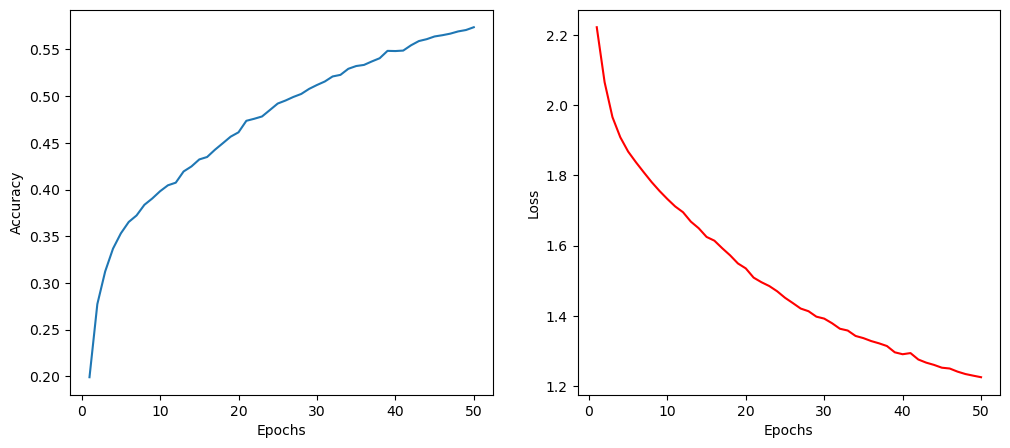

In [33]:
# Your code here :
acc_points = history.history["accuracy"]
loss_points = history.history["loss"]
epochs = range(1, len(acc_points) + 1)

# Plot accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(epochs, acc_points)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")

# Plot loss
ax2.plot(epochs, loss_points, color="red")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [34]:
from keras.backend import clear_session
clear_session()

In [36]:
# Your code here :
model2 = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'), 
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'), 
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')    
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [37]:
# Your code here :
model2.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
history2 = model.fit(x_train, y_train, epochs=50, batch_size=512)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.5745 - loss: 1.2185
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.5783 - loss: 1.2082
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.5809 - loss: 1.2072
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5815 - loss: 1.1969
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.5851 - loss: 1.1904
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5877 - loss: 1.1874
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.5894 - loss: 1.1836
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5906 - loss: 1.1766
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5925 - loss: 1.1737
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5930 - loss: 1.1693
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.5966 - loss: 1.1627
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy:

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

Text(0, 0.5, 'Loss')

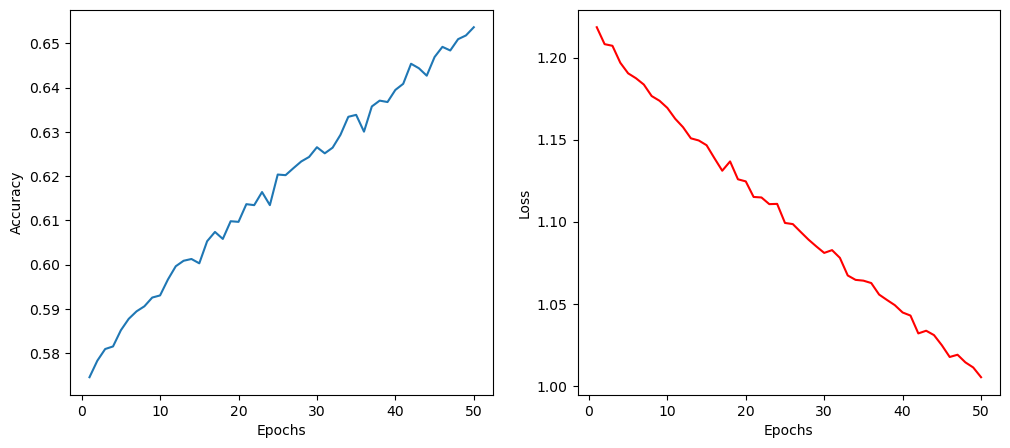

In [41]:
# Your code here :
acc_points2 = history2.history["accuracy"]
loss_points2 = history2.history["loss"]
epochs2 = range(1, len(acc_points2) + 1)

# Plot accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(epochs2, acc_points2)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")

# Plot loss
ax2.plot(epochs2, loss_points2, color="red")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")

**Comment on the observation**

The deeper model does reach higher final accuracy and lower final loss, however, the plots are not what we would expect for an optimal solution. The graphs don't increase/decrease smoothly - instead, they are jagged zig-zags, which indicates that our learning rate is too hight (the model overshoots the solution). 

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


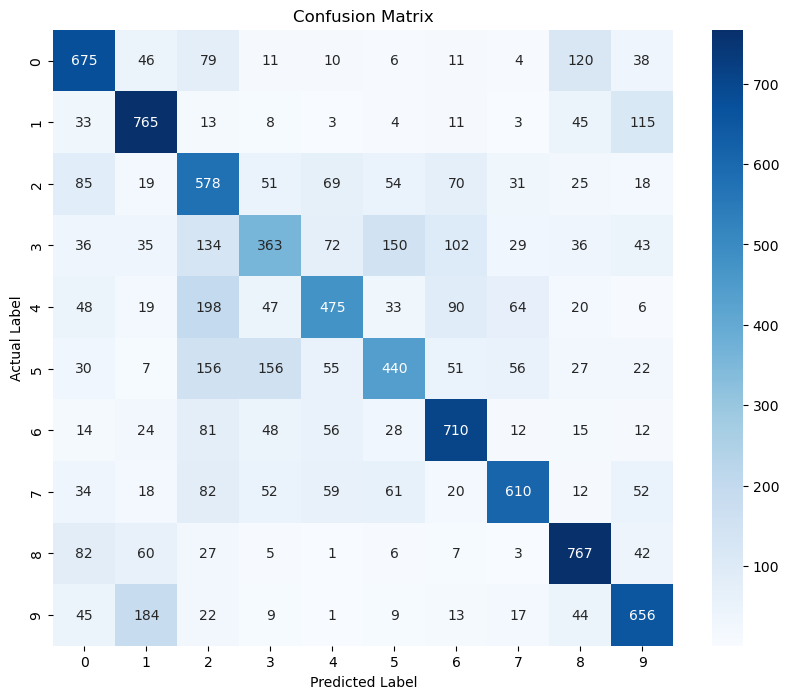

In [ ]:
# Your code here :
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)


cm = confusion_matrix(true_labels, pred_labels)

# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


**Comment here :**

The highest number of confusion occurs between classes 2 and 4, as well as between classes 1 and 9 and 2 and 5

...

*    Print the test accuracy for the trained model.

In [52]:
# Your code here :
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Test Accuracy: 60.39%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [57]:
# Your code here :
model3 = models.Sequential([
    layers.Input(shape=(64, 64, 3)),
    layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'), 
    layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'), 
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
     layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=2),
     layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'),
     layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')    
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [59]:
# Your code here :
import tensorflow as tf

x_train_64 = tf.image.resize(x_train, (64, 64))
x_test_64 = tf.image.resize(x_test, (64, 64))

model3.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history3 = model3.fit(x_train_64, y_train, epochs=10, batch_size=512)
predictions2 = model3.predict(x_test_64)
pred_labels2 = np.argmax(predictions2, axis=1)

cm = confusion_matrix(true_labels, pred_labels2)

# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 711s 7s/step - accuracy: 0.1358 - loss: 2.2979
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 749s 8s/step - accuracy: 0.1734 - loss: 2.2804
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 864s 9s/step - accuracy: 0.2151 - loss: 2.1933
Epoch 4/10
90/98 ━━━━━━━━━━━━━━━━━━━━ 1:11 9s/step - accuracy: 0.2395 - loss: 2.1241

KeyboardInterrupt: 

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions are needed to introduce non-linearity (as real-world data is usually not linear). Since the sum of weighted outputs of each neuron plus bias is essentially a linear equation, without activation functions, our entire network would be one big linear equation. 

_

2 - Key Differences between sigmoid and softmax:

Sigmoid is used for binary classification, and softmax is used in multi-classification. 

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary cross-entropy is used for binary classification, categorical cross-entropy is used for multi-classification. 
_
